```
[Title] Two-Way ANOVA
[Author] Yibeck Lee(yibec.Lee@gmail.com)
[Contents] 
 - Two-Way ANOVA for FDC Parameter
```

In [3]:
%pylab inline
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns
from pandasql import sqldf

Populating the interactive namespace from numpy and matplotlib


In [4]:
pysqldf = lambda q: sqldf(q, globals())
df = pd.read_csv("../data_source/WIP_HISTORY.csv")
df.corr(method='pearson')

,TARGET_VALUE,GOOD_BAD,LINE,EQUIPMENT,GAS_PRESSURE,TEMPERATURE,THICKNESS,WAITING_TIME,PROCESS_TIME,INTENSITY,RPM,TIME_GAP,SPEED
TARGET_VALUE,1.000000,0.223602,0.096372,0.153725,-0.062426,0.048766,0.372615,0.349891,0.022198,0.309442,0.202264,-0.337871,0.428800
GOOD_BAD,0.223602,1.000000,0.016785,0.305362,0.132977,0.156108,-0.161578,0.124836,0.268108,0.350427,0.224023,-0.094647,0.295190
LINE,0.096372,0.016785,1.000000,0.400012,-0.092977,0.027118,0.059429,-0.045650,0.029234,0.008407,0.074723,-0.064829,0.157965
EQUIPMENT,0.153725,0.305362,0.400012,1.000000,-0.025965,0.066396,0.002282,-0.009131,0.096855,0.153023,0.145782,-0.069336,0.208958
GAS_PRESSURE,-0.062426,0.132977,-0.092977,-0.025965,1.000000,-0.088498,-0.066479,-0.116885,0.018620,-0.110673,-0.140616,-0.040707,0.016965
TEMPERATURE,0.048766,0.156108,0.027118,0.066396,-0.088498,1.000000,0.000777,0.052813,0.054029,0.080717,0.031755,0.023435,0.041930
THICKNESS,0.372615,-0.161578,0.059429,0.002282,-0.066479,0.000777,1.000000,0.040017,-0.031659,-0.042260,-0.002660,0.008198,-0.038761
WAITING_TIME,0.349891,0.124836,-0.045650,-0.009131,-0.116885,0.052813,0.040017,1.000000,-0.098425,0.105935,-0.005850,0.111746,0.014293
PROCESS_TIME,0.022198,0.268108,0.029234,0.096855,0.018620,0.054029,-0.031659,-0.098425,1.000000,0.065897,0.043476,-0.012613,0.085077
INTENSITY,0.309442,0.350427,0.008407,0.153023,-0.110673,0.080717,-0.042260,0.105935,0.065897,1.000000,0.149603,0.006070,0.138085


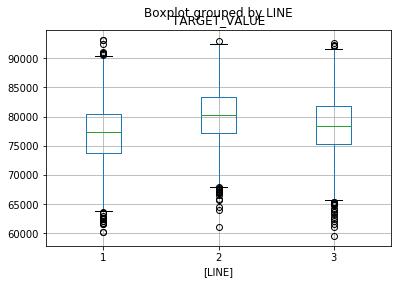

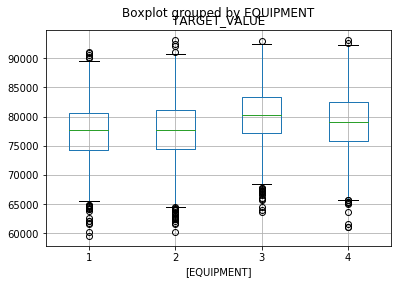

In [7]:

df[['TARGET_VALUE','LINE']].boxplot(by='LINE')
df[['TARGET_VALUE','EQUIPMENT']].boxplot(by='EQUIPMENT')

In [9]:
sqlDf = pysqldf("select LINE, avg(TARGET_VALUE) as AVG_TARGET_VALUE from df group by LINE ;")
sqlDf

,LINE,AVG_TARGET_VALUE
0,1,77099.759097
1,2,80223.702400
2,3,78462.668032


In [10]:
sqlDf = pysqldf("select EQUIPMENT, avg(TARGET_VALUE) as AVG_TARGET_VALUE from df group by EQUIPMENT ;")
sqlDf

,EQUIPMENT,AVG_TARGET_VALUE
0,1,77462.228696
1,2,77609.790691
2,3,80169.695590
3,4,79100.120467


In [16]:
sqlDf = pysqldf("select LINE, EQUIPMENT, avg(TARGET_VALUE) as AVG_TARGET_VALUE from df group by LINE, EQUIPMENT ;")
sqlDf

,LINE,EQUIPMENT,AVG_TARGET_VALUE
0,1,1,77141.156960
1,1,2,76780.860621
2,1,4,78644.676282
3,2,2,78942.261261
4,2,3,80361.386364
5,2,4,80402.380814
6,3,1,78365.688889
7,3,2,78310.186880
8,3,3,79134.800613
9,3,4,78470.887958


In [11]:
model = ols('TARGET_VALUE ~ C(LINE)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(LINE),2.0,1.499189e+10,7.495946e+09,329.64583,2.288614e-139
Residual,9997.0,2.273257e+11,2.273939e+07,NaN,NaN


In [12]:
model = ols('TARGET_VALUE ~ C(EQUIPMENT)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(EQUIPMENT),3.0,1.095329e+10,3.651098e+09,157.74417,6.723098e-100
Residual,9996.0,2.313643e+11,2.314569e+07,NaN,NaN


In [14]:
model = ols('TARGET_VALUE ~ C(LINE)+C(EQUIPMENT)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(LINE),2.0,1.499189e+10,7.495946e+09,330.942231,6.803955e-140
C(EQUIPMENT),3.0,9.584543e+08,3.194848e+08,14.105091,3.589032e-09
Residual,9994.0,2.263673e+11,2.265032e+07,NaN,NaN


In [15]:
model = ols('TARGET_VALUE ~ C(LINE)+C(EQUIPMENT)+C(LINE):C(EQUIPMENT)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(LINE),2.0,1.499189e+10,7.495946e+09,331.862591,2.881856e-140
C(EQUIPMENT),3.0,9.584543e+08,3.194848e+08,14.144317,3.389320e-09
C(LINE):C(EQUIPMENT),6.0,8.144728e+08,1.357455e+08,6.009761,2.755580e-06
Residual,9990.0,2.256491e+11,2.258750e+07,NaN,NaN
